# PROYECTO MÓDULO 2

**Integrantes:**
- José Eddie Aguilar Ceballos
- Nancy Esmeralda González Monterrubio

# Brokers Latinos
### Decisiones de inversión usando simulación Montecarlo


**Objetivo General:**

El objetivo de este proyecto es mostrar un programa que pueda ayudar a algún inversionista a encontrar un plan o portafolio de inversión con la mayor probabilidad de ganancia. 

Para esto se utilizará simulación montecarlo, a fin de encontrar una predicción aproximada de las acciones.


**Objetivo Específico:**

Hay un inversionista en México que está actualmente invirtiendo en la Bolsa Mexicana de Valores y desea expandir su capital de inversión de $\$$500,000.00 a $\$$650,000.00

Al tener ya una inversión en diferentes empresas de la bolsa, él solo desea invertir un total de $\$$650,000.00 en dos acciones diferentes. 

Cláusulas del inversionista:

- El cliente quiere invertir en dos nuevos sectores para tener un portafolio más variado:
 - Energía
 - Salud
 
- Del sector energía tiene dos opciones para invertir:
 - Sempra energy (SRE)
 - Vista oil (VISTAA)
 
- Del sector salud tiene tres opciones para invertir:
 - Genomma Lab (LABB)
 - Medica sur (MEDICAB)

- Desea invertir en una sola acción de cada sector.

- Desea invertir dos tercios de su nuevo capital en la acción que más probabilidad de éxito anual (15%) tenga, y el resto en la otra acción.

El objetivo es encontrar la acción con la probabilidad más alta de generar ganancias, en cada sector.

**El precio de las acciones está representado en la siguiente tabla, la cual fue recuperado de Grupo BMV:**

Empresa|Precio de acción|Sector
:----|----|----
Sempra energy|$\$2,988.50$|Energía
Vista oil|$\$265.00$|Energía
Genomma Lab|$\$15.01$|Salud
Medica sur|$\$38.40$|Salud

### Modelo que representa el problema

**1. Media y desviación estándar de los rendimientos**

- Para esta simulación Montecarlo se utilizará una distribución normal para generar números aleatorios y poder simular rendimientos. Por lo tanto se extraerán valores históricos de las acciones para determinar sus rendimientos y datos estadísticos.

**2. Deducción del modelo:** 

Para saber los rendimientos de cada acción, se usará el precio anterior con el actual para obtener un rendimiento logarítmico:

$r_t=\ln\left(\frac{S_t}{S_{t-1}}\right)$

Posteriormente para calcular los precios simulados teniendo los rendimientos, es la multiplicación del precio anterior por el rendimiento más 1. Al escalar esta ecuación a k número de datos, se tiene que:

$p_{k}=p_{-1}(R_0+1)\cdots(R_{k}+1)$


**3. Situación a representar y limitaciones:**

Con este modelo estaremos representando una aproximación de los valores futuros de una acción (en este caso a un año). De esta forma, podemos tener una idea de como se va a comportar el valor de esa acción y saber las ganancias o precios que podemos esperar.


### Solución del problema de optimización

In [2]:
import pandas_datareader.data as web
import pandas as pd
import numpy as np
import matplotlib.pyplot as pt
%matplotlib inline

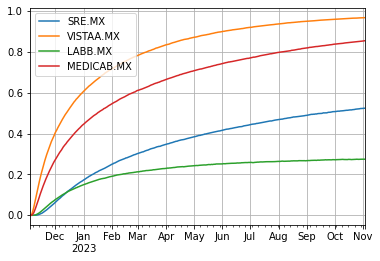

In [22]:
def getClose(name, start, end):
    return web.DataReader(name, "yahoo", start, end)["Adj Close"]

def sim_r(media, std, inicio, dias, N):
    r = np.random.normal(media, std, size=(dias, N))
    fechas = pd.date_range(inicio, periods=dias)
    return pd.DataFrame(index=fechas, data=r)


acciones = [{"Nombre": "Sempra energy", "Ticker": "SRE.MX"},
            {"Nombre": "Vista oil", "Ticker": "VISTAA.MX"},
            {"Nombre": "Genomma Lab", "Ticker": "LABB.MX"},
            {"Nombre": "Medica sur", "Ticker": "MEDICAB.MX"}]

for i in acciones:
    i["data"] = getClose(i["Ticker"], "2020-11-03", "2022-11-03")
    i["r"] = ((i["data"] - i["data"].shift())/i["data"].shift()).dropna()
    i["simulacion"] = sim_r(i["r"].mean(), i["r"].std(), "2022-11-04", 365, 100000)
    i["precios"] = (1 + i["simulacion"]).cumprod()*i["data"][-1]
    i["deseado"] = i["data"][-1]*1.15
    i["pasa"] = i["precios"] >= i["deseado"]
    i["probabilidad"] = i["pasa"].mean(axis=1)
    i["probabilidad"].plot(grid = True, label=i["Ticker"])

pt.legend()

### Visualización de la solución del problema

Como podemos ver de la gráfica:

- Del sector energía (SRE y VISTA), la acción que más probabilidad de superar un 15% tiene, es Vista oil.

- Del sector salud (LAB  y MEDICA), la acción que más probabilidad de superar un 15% tiene, es Médica Sur.

Entre Vista oil y Médica Sur, la acción que más probabilidad de superar un 15% tiene, es Vista oil.

Por lo tanto, la inversión a recomendar al cliente es la siguiente:

Empresa|Sector|Precio|Monto|N. acciones
:----|----|----|----|----
Sempra energy|Energía|$\$$2,988.50|$\$$0.00|0 acciones
Vista oil|Energía|$\$$265.00|$\$$100,000.00|377 acciones
Genomma Lab|Salud|$\$$15.01|$\$$0.00|0 acciones
Medica sur|Salud|$\$$38.40|$\$$50,000.00|1,302 acciones

La simulación Montecarlo se condujo a una solución factible debido a que, los resultados obtenidos representan una inversión cumpliendo las condiciones del cliente y encontrando la posibilidad con más ganancia.

### Conclusión

Como conclusión, se logró encontrar una estrategia de inversión que intente lograr una mayor ganancia del inversionista, esto con base en las restricciones que él mismo propuso en un primer momento. Tanto las empresas en las que obligatoriamente quería invertir, como el monto que deseaba utilizar. De esta forma, se agregan más sectores e inversiones a su portafolio, haciéndolo más diverso.

A pesar de lograr los objetivos del proyecto y utilizar la simulación Montecarlo para resolver problemas de portafolios de inversión, hay que tomar en cuenta que la simulación Montecarlo tiene ciertas limitaciones. 

La simulación Montecarlo tiene resultados igual de buenos a los datos de entrada, entre más información y datos se tenga, mejores resultados y más confiables serán, esto hace que no sea muy confiable al hacer una simulación relativamente sencilla. Además, este tipo de simulaciones no tienen en cuenta fenómenos importantes en el mundo y en las finanzas, como una pandemia o una crisis financiera. Por lo cual, esta simulación está sujeta a un flujo similar al que los datos históricos tuvieron.

**Referencias:**

- Grupo BMV Home. (s. f.). Recuperado 02 de noviembre de 2022, de https://www.bmv.com.mx/